In [1]:
from brian2 import *

In [14]:
times = [0.1, 0.3, 0.5]
indices = [1, 2, 3]

# Импортируем необходимые библиотеки
import pandas as pd

# Создаем DataFrame
df = pd.DataFrame({'time': times, 'index': indices})

# Устанавливаем шаг времени
time_step = 0.1  # Например, 0.1 секунды

# Получаем максимальное время спайка
max_time = max(times)

# Создаем итоговый DataFrame
output_df = pd.DataFrame()

# Для каждого момента времени с заданным шагом
for time in times:
    for neuron_index in range(1, 10):
        # Проверяем, есть ли спайк для данного нейрона в данный момент времени
        spike = 1 if (time, neuron_index) in zip(times, indices) else 0
        # Добавляем строку в итоговый DataFrame
        output_df = output_df.append({'time': time, 'index': neuron_index, 'spike': spike}, ignore_index=True)

# Сохраняем итоговый DataFrame в текстовый файл
output_df

WARNING    C:\Users\bgre4\AppData\Local\Temp\ipykernel_11740\1841492485.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'time': time, 'index': neuron_index, 'spike': spike}, ignore_index=True)
 [py.warnings]
WARNING    C:\Users\bgre4\AppData\Local\Temp\ipykernel_11740\1841492485.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'time': time, 'index': neuron_index, 'spike': spike}, ignore_index=True)
 [py.warnings]
WARNING    C:\Users\bgre4\AppData\Local\Temp\ipykernel_11740\1841492485.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'time': time, 'index': neuron_index, 'spike': spike}, ignore_index=True)
 [py.warnings]
WARN

,time,index,spike
0,0.1,1.0,1.0
1,0.1,2.0,0.0
2,0.1,3.0,0.0
3,0.1,4.0,0.0
4,0.1,5.0,0.0
5,0.1,6.0,0.0
6,0.1,7.0,0.0
7,0.1,8.0,0.0
8,0.1,9.0,0.0
9,0.3,1.0,0.0


In [12]:
start_scope()

tau = 10*ms
eqs = '''
dv/dt = (1-v)/tau : 1
'''

G = NeuronGroup(5, eqs, threshold='v>0.8', reset='v = 0', method='exact')

spikemon = SpikeMonitor(G)

run(50*ms)

print(spikemon.t/ms, spikemon.i, spikemon.count)

[16.  16.  16.  16.  16.  32.1 32.1 32.1 32.1 32.1 48.2 48.2 48.2 48.2
 48.2] <spikemonitor_1.i: array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4])> <spikemonitor_1.count: array([3, 3, 3, 3, 3])>


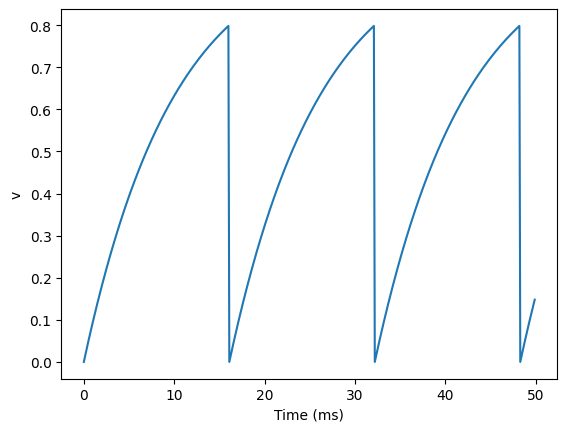

In [4]:
start_scope()

tau = 10*ms
eqs = '''
dv/dt = (1-v)/tau : 1
'''

G = NeuronGroup(2, eqs, threshold='v>0.8', reset='v = 0', method='exact')

M = StateMonitor(G, 'v', record=0)
run(50*ms)
plot(M.t/ms, M.v[0])
xlabel('Time (ms)')
ylabel('v');

In [43]:
neurons_with_classes = {'a': [5, 5, 3], 
                        'b': [1, 1, 3], 
                        'c': [5, 1, 1, 5]}

for key in neurons_with_classes.keys():
            neurons_with_classes[key] = max(neurons_with_classes[key], 
                                            key=neurons_with_classes[key].count)
neurons_with_classes           

{'a': 5, 'b': 1, 'c': 5}

In [25]:
import networkx as nx
def generate_small_world(n_nodes, k, p):
    return nx.watts_strogatz_graph(n_nodes, k, p)

g = generate_small_world(7, 3, 0.5)

edges = g.edges()

res_0 = [0]
for g, v in g.edges():
    if g == 0:
        res_0.append(v)
        

# Выводим список связанных нейронов
print(res, edges)

[0, 6, 2] [(0, 6), (0, 2), (1, 2), (2, 3), (3, 5), (4, 5), (5, 6)]


10017.45 10017.2
10017.7 10017.2
10017.8 10017.7
10017.9 10017.7
10018.15 10017.7
10018.4 10018.15
10018.45 10018.15
10018.45 10018.45
10018.5 10018.45
10018.75 10018.45
10018.9 10018.75
10018.95 10018.75
10018.95 10018.75
10019.0 10018.75
10019.05 10018.75
10019.1 10019.05
10019.1 10019.05
10019.25 10019.05
10019.3 10019.05
10019.35 10019.05
10019.4 10019.35
10019.4 10019.35
10019.4 10019.35
10019.4 10019.35
10019.45 10019.35
10019.5 10019.35
10019.5 10019.35
10019.5 10019.35
10019.6 10019.35
10019.6 10019.35
10019.7 10019.35
10019.75 10019.7
10019.8 10019.7
10019.8 10019.7
10019.8 10019.7
10019.85 10019.7
10019.85 10019.7
10019.95 10019.7
10019.95 10019.7
10019.95 10019.7
10020.0 10019.7
10020.05 10020.0
10020.1 10020.0
10020.1 10020.0
10020.15 10020.0
10020.2 10020.0
10020.2 10020.0
10020.2 10020.0
10020.2 10020.0
[[(6, 10017.2), (89, 10017.45)], [(48, 10017.7), (70, 10017.8), (11, 10017.9)], [(16, 10018.15), (26, 10018.4)], [(67, 10018.45), (94, 10018.45), (53, 10018.5)], [(80, 100

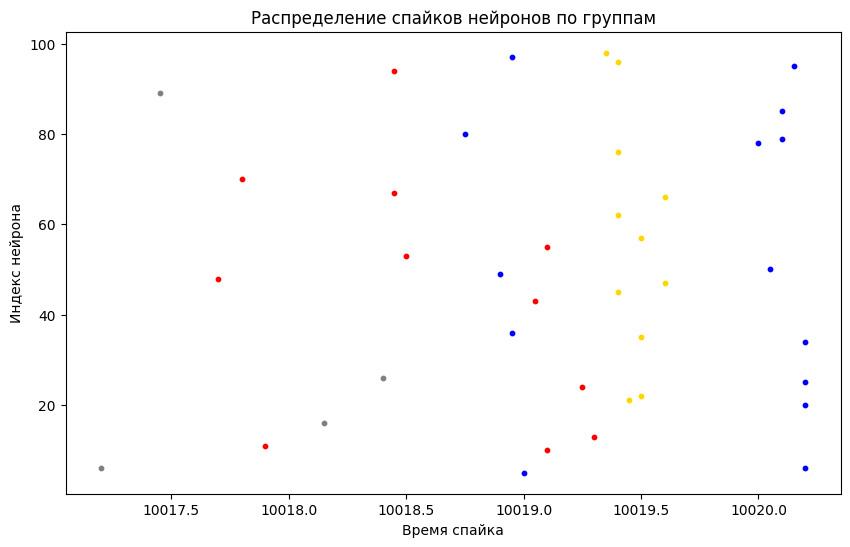

In [32]:
import matplotlib.pyplot as plt

spike_times = [10017.2, 10017.45, 10017.7, 10017.8, 10017.9, 10018.15, 10018.4, 10018.45, 10018.45, 10018.5, 10018.75, 10018.9, 10018.95, 10018.95, 10019.0, 10019.05, 10019.1, 10019.1, 10019.25, 10019.3, 10019.35, 10019.4, 10019.4, 10019.4, 10019.4, 10019.45, 10019.5, 10019.5, 10019.5, 10019.6, 10019.6, 10019.7, 10019.75, 10019.8, 10019.8, 10019.8, 10019.85, 10019.85, 10019.95, 10019.95, 10019.95, 10020.0, 10020.05, 10020.1, 10020.1, 10020.15, 10020.2, 10020.2, 10020.2, 10020.2]  # Добавлены дополнительные времена спайков
neuron_indices = [6, 89, 48, 70, 11, 16, 26, 67, 94, 53, 80, 49, 36, 97, 5, 43, 55, 10, 24, 13, 98, 62, 76, 96, 45, 21, 57, 22, 35, 47, 66, 52, 12, 27, 46, 64, 30, 38, 61, 8, 23, 78, 50, 79, 85, 95, 20, 25, 34, 6]  # Добавлены повторяющиеся индексы нейронов
dt = 0.25  # Пороговое значение времени для разделения спайков на группы


# Список кортежей (индекс нейрона, время спайка)
neuron_spikes = list(zip(neuron_indices, spike_times))

# Создание групп нейронов на основе условия разницы времени спайков меньше dt
neuron_groups = []
current_group = [neuron_spikes[0]]
prev_neuron, prev_time = neuron_spikes[0]

for neuron, time in neuron_spikes[1:]:
    print(time, prev_time)
    if time - prev_time <= dt:
        current_group.append((neuron, time))
    else:
        neuron_groups.append(current_group)
        current_group = [(neuron, time)]
        prev_time = time
    

neuron_groups.append(current_group)

print(neuron_groups)

# Цвета для групп
colors_2 = ['grey', 'm']
colors_3 = ['b', 'r']
colors_10 = ['gold', 'pink']

# Построение точечного графика с окрашиванием нейронов по группам
plt.figure(figsize=(10, 6))
for i, group in enumerate(neuron_groups):
    color_2 = colors_2[i % len(colors_2)]
    color_3 = colors_3[i % len(colors_3)]
    color_10 = colors_10[i % len(colors_10)]
    
    if len(group)==1:
            for neuron, time in group:
                plt.scatter(time, neuron, color='black', s=10, label=f'Нейрон {neuron}')
    if len(group)==2:
        for neuron, time in group:
            plt.scatter(time, neuron, color=color_2, s=10, label=f'Нейрон {neuron}')
    if len(group)>=3 and len(group)<10:
        for neuron, time in group:
            plt.scatter(time, neuron, color=color_3, s=10, label=f'Нейрон {neuron}')
    if len(group)>10:
        for neuron, time in group:
            plt.scatter(time, neuron, color=color_10, s=10, label=f'Нейрон {neuron}')

plt.xlabel('Время спайка')
plt.ylabel('Индекс нейрона')
plt.title('Распределение спайков нейронов по группам')
plt.show()

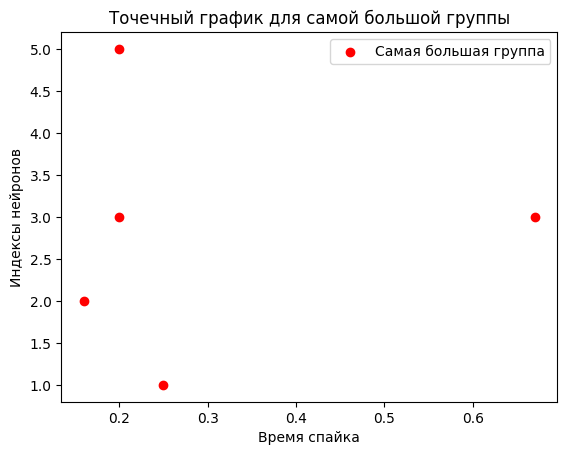

In [17]:
import matplotlib.pyplot as plt
from collections import defaultdict

# Пример данных времени спайков нейронов и их индексов
# Пример данных времени спайков нейронов и их индексов
spike_times = [0.25, 0.16, 0.2, 0.8, 0.2, 0.52, 0.6, 0.61, 0.67]
neuron_indices = [1, 2, 3, 4, 5, 6, 1, 2, 3]
dt = 0.05  # Временная дельта в секундах

# Создание словаря, где ключ - время спайка, значение - индекс нейрона
spike_dict = defaultdict(list)
for time, neuron in zip(spike_times, neuron_indices):
    spike_dict[time].append(neuron)

# Находим самую большую группу одновременно спайкующих нейронов
max_group = max(spike_dict.values(), key=len)
max_time = max(spike_dict, key=lambda k: len(spike_dict[k]))

# Формируем данные для построения графика для нейронов из самой большой группы
max_group_spike_times = []
max_group_neuron_indices = []
for time, neurons in spike_dict.items():
    for neuron in neurons:
        if abs(time - max_time) <= dt or neuron in max_group:
            max_group_spike_times.append(time)
            max_group_neuron_indices.append(neuron)

plt.scatter(max_group_spike_times, max_group_neuron_indices, color='red', label='Самая большая группа')
plt.xlabel('Время спайка')
plt.ylabel('Индексы нейронов')
plt.title('Точечный график для самой большой группы')
plt.legend()
plt.show()

In [2]:
import os 

len(os.listdir('spikes'))

0

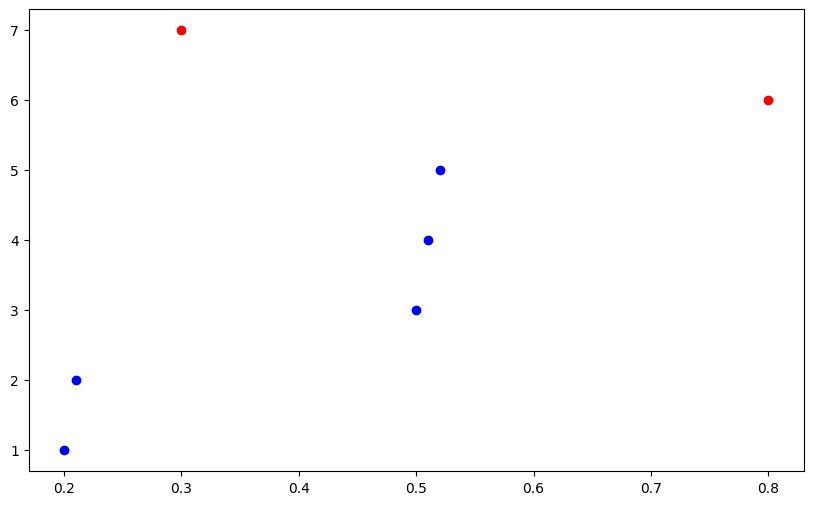

In [16]:
import matplotlib.pyplot as plt

spike_times = [0.2, 0.21, 0.3, 0.5,  0.51, 0.52, 0.8]
neuron_indices = [1, 2, 7, 3, 4, 5, 6]
dt = 0.02  # Пороговое значение времени для разделения спайков на группы

# Создание словаря для хранения индексов нейронов и их времени спайков
neuron_data = {neuron: time for neuron, time in zip(neuron_indices, spike_times)}

# Создание групп нейронов на основе условия разницы времени спайков меньше 50 мс
neuron_groups = []
current_group = []
prev_time = spike_times[0]

for neuron, time in neuron_data.items():
    if time - prev_time < dt:
        current_group.append(neuron)
    else:
        neuron_groups.append(current_group)
        current_group = [neuron]
    prev_time = time

neuron_groups.append(current_group)

# Создание цветовой метки для каждой группы нейронов
colors = ['b', 'r']

# Построение точечного графика с окрашиванием нейронов по группам
plt.figure(figsize=(10, 6))
for i, group in enumerate(neuron_groups):
    color = colors[i % 2]
    for neuron in group:
        plt.scatter(neuron_data[neuron], neuron, color=color)

In [27]:
max_group

[4, 1, 6, 7]

AttributeError: module 'matplotlib.pyplot' has no attribute 'yaxis'

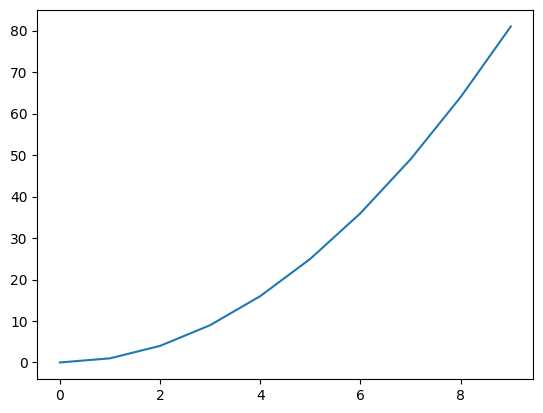

In [6]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

# Создаем некоторые данные для отображения
x = range(0, 10)
y = [i**2 for i in x]

# Создаем график
fig, ax = plt.subplots()

# Рисуем график
ax.plot(x, y)

# Устанавливаем шаг сетки по оси Y равным 5
ax.yaxis.set_major_locator(MultipleLocator(5))

# Отображаем сетку
ax.grid(True)

# Показываем график
plt.show()

In [6]:
spike_times = [0.2, 0.18, 0.21, 0.49, 0.51, 0.52, 0.53, 0.55,  0.59, 0.8]
[item for item in spike_times if item <= spike_times[0] + 0.3]

[0.2, 0.18, 0.21, 0.49]